In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


# # coffee data
# url="https://github.com/jldbc/coffee-quality-database/raw/master/data/robusta_data_cleaned.csv"
# coffee_features=pd.read_csv(url)

# # coffe score

# url="https://raw.githubusercontent.com/jldbc/coffee-quality-database/master/data/robusta_ratings_raw.csv"
# coffee_quality=pd.read_csv(url)

In [19]:
df = pd.read_csv('data/Train.csv')
df.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0


In [20]:
df.isnull().sum()

ID        0
DATOP     0
FLTID     0
DEPSTN    0
ARRSTN    0
STD       0
STA       0
STATUS    0
AC        0
target    0
dtype: int64

In [21]:
df.describe()

,target
count,107833.000000
mean,48.733013
std,117.135562
min,0.000000
25%,0.000000
50%,14.000000
75%,43.000000
max,3451.000000


# Data cleaningin and feature engineering

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      107833 non-null  object 
 1   DATOP   107833 non-null  object 
 2   FLTID   107833 non-null  object 
 3   DEPSTN  107833 non-null  object 
 4   ARRSTN  107833 non-null  object 
 5   STD     107833 non-null  object 
 6   STA     107833 non-null  object 
 7   STATUS  107833 non-null  object 
 8   AC      107833 non-null  object 
 9   target  107833 non-null  float64
dtypes: float64(1), object(9)
memory usage: 8.2+ MB


In [23]:
df['STATUS'].value_counts()

STATUS
ATA    93679
SCH    13242
DEP      467
RTR      294
DEL      151
Name: count, dtype: int64

In [24]:
df['DEPSTN'].value_counts()

DEPSTN
TUN    42522
DJE    10252
ORY     6755
MIR     5248
MRS     2845
       ...  
ADB        1
SKG        1
OTP        1
KBP        1
CTA        1
Name: count, Length: 132, dtype: int64

In [26]:
import matplotlib.pyplot as plt

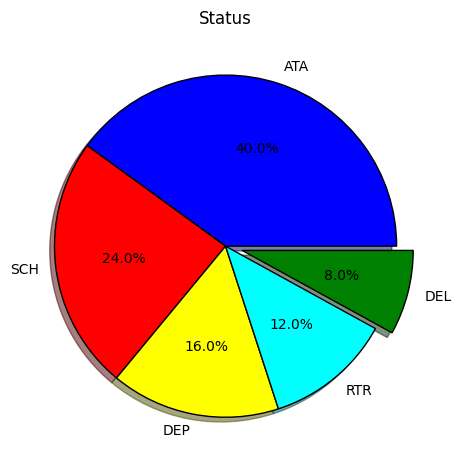

In [27]:
slices= [100,60,40,30,20] #adding percentage to my chart
labels = ['ATA','SCH','DEP','RTR','DEL']
colors =['blue','red','yellow','cyan','green']
explode =[0,0,0,0,0.1]
plt.pie(slices,labels=labels,colors=colors, explode=explode, shadow=True, autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.title('Status')
plt.tight_layout()

plt.show()

In [28]:
from datetime import datetime

In [30]:
df['DATOP']= pd.to_datetime(df['DATOP'], format='%Y-%m-%d')
df['STD']= pd.to_datetime(df['STD'], format='%Y-%m-%d %H:%M:%S')
df['STA']= pd.to_datetime(df['STA'], format='%Y-%m-%d %H.%M.%S')

In [31]:
date_column = ['STD','STA','DATOP']
def extract_date(train,cols,):
    for x in cols:
        df[x+'_year']= df[x].dt.year
        df[x+'_month']= df[x].dt.month
        df[x+'_day']= df[x].dt.day
        df[x+'_hour']= df[x].dt.hour
        df[x+'_minute']= df[x].dt.minute
        df[x+'_second']= df[x].dt.second
    train.drop(columns=date_column, axis=1, inplace=True)
extract_date(df,date_column)

In [32]:
df

,ID,FLTID,DEPSTN,ARRSTN,STATUS,AC,target,STD_year,STD_month,STD_day,...,STA_day,STA_hour,STA_minute,STA_second,DATOP_year,DATOP_month,DATOP_day,DATOP_hour,DATOP_minute,DATOP_second
0,train_id_0,TU 0712,CMN,TUN,ATA,TU 32AIMN,260.0,2016,1,3,...,3,12,55,0,2016,1,3,0,0,0
1,train_id_1,TU 0757,MXP,TUN,ATA,TU 31BIMO,20.0,2016,1,13,...,13,16,55,0,2016,1,13,0,0,0
2,train_id_2,TU 0214,TUN,IST,ATA,TU 32AIMN,0.0,2016,1,16,...,16,6,45,0,2016,1,16,0,0,0
3,train_id_3,TU 0480,DJE,NTE,ATA,TU 736IOK,0.0,2016,1,17,...,17,17,0,0,2016,1,17,0,0,0
4,train_id_4,TU 0338,TUN,ALG,ATA,TU 320IMU,22.0,2016,1,17,...,17,15,50,0,2016,1,17,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107828,train_id_107828,WKL 0000,TUN,TUN,SCH,TU 32AIML,0.0,2018,7,5,...,6,2,0,0,2018,7,5,0,0,0
107829,train_id_107829,UG 0003,DJE,TUN,SCH,UG AT7AT7,0.0,2018,1,13,...,13,9,0,0,2018,1,13,0,0,0
107830,train_id_107830,SGT 0000,TUN,TUN,SCH,TU 736IOK,0.0,2018,11,7,...,7,12,50,0,2018,11,7,0,0,0
107831,train_id_107831,UG 0010,TUN,DJE,ATA,TU CR9ISA,0.0,2018,1,23,...,23,18,45,0,2018,1,23,0,0,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            107833 non-null  object 
 1   FLTID         107833 non-null  object 
 2   DEPSTN        107833 non-null  object 
 3   ARRSTN        107833 non-null  object 
 4   STATUS        107833 non-null  object 
 5   AC            107833 non-null  object 
 6   target        107833 non-null  float64
 7   STD_year      107833 non-null  int32  
 8   STD_month     107833 non-null  int32  
 9   STD_day       107833 non-null  int32  
 10  STD_hour      107833 non-null  int32  
 11  STD_minute    107833 non-null  int32  
 12  STD_second    107833 non-null  int32  
 13  STA_year      107833 non-null  int32  
 14  STA_month     107833 non-null  int32  
 15  STA_day       107833 non-null  int32  
 16  STA_hour      107833 non-null  int32  
 17  STA_minute    107833 non-null  int32  
 18  STA_

In [35]:
df['FLTID'].value_counts()

FLTID
WKL 0000     3105
TU 0613      1284
TU 0397      1184
AOG 0000     1103
TU 0634      1075
             ... 
TU 2177         1
TU 7251         1
TU 2570         1
TU 2561         1
UG 1004         1
Name: count, Length: 1861, dtype: int64

## Splitting data for testing 

In [6]:
df.columns

Index(['ID', 'DATOP', 'FLTID', 'DEPSTN', 'ARRSTN', 'STD', 'STA', 'STATUS',
       'AC', 'target'],
      dtype='object')

In [7]:
columns_to_drop = ['ID','DATOP', 'STD','AC', 'STA']
df = df.drop(columns= columns_to_drop)

In [8]:
# Verwendung von replace(), um die Spalte "delay" basierend auf "target" zu setzen
df['delay'] = np.where(df['target'] > 15, 1, 0)

In [9]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [10]:
df.head(50)

,FLTID,DEPSTN,ARRSTN,STATUS,target,delay
0,TU 0712,CMN,TUN,ATA,260.0,1
1,TU 0757,MXP,TUN,ATA,20.0,1
2,TU 0214,TUN,IST,ATA,0.0,0
3,TU 0480,DJE,NTE,ATA,0.0,0
4,TU 0338,TUN,ALG,ATA,22.0,1
5,TU 0283,TLS,TUN,ATA,53.0,1
6,TU 0514,TUN,BCN,ATA,10.0,0
7,TU 0716,TUN,ORY,ATA,15.0,0
8,TU 0752,TUN,FCO,ATA,16.0,1
9,TU 0996,TUN,NCE,ATA,21.0,1


In [16]:
df['Cursed'] = (df['DEPSTN'] == 'TUN').astype(int)

KeyError: 'DEPSTN'

In [11]:
# Preprocess the data
# Convert categorical variables into numerical using one-hot encoding
cat_features = ['FLTID', 'DEPSTN', 'ARRSTN', 'STATUS']
df = pd.get_dummies(df, columns = cat_features)
df = df.astype(int)

# Split the data into features (X) and target variable (y)
X = df.drop('delay', axis=1)
y = df['delay']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


In [12]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Confusion Matrix: 
 [[11485     0]
 [    0 10082]]


In [13]:
y_pred.mean()

0.46747345481522695

In [14]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86266 entries, 36743 to 95338
Columns: 2127 entries, target to STATUS_SCH
dtypes: int64(2127)
memory usage: 1.4 GB


In [15]:
altitude_low_meters_mean = X_train["altitude_low_meters"].mean()
altitude_high_meters_mean = X_train["altitude_high_meters"].mean()
altitude_mean_log_mean = X_train["altitude_mean_log"].mean()

KeyError: 'altitude_low_meters'

In [ ]:
# fillna with mean.. 
X_train["altitude_low_meters"] = X_train["altitude_low_meters"].fillna(altitude_low_meters_mean)
X_train["altitude_high_meters"] = X_train["altitude_high_meters"].fillna(altitude_high_meters_mean)
X_train["altitude_mean_log"] = X_train["altitude_mean_log"].fillna(altitude_mean_log_mean)

In [ ]:
print(f"altitude low meters mean is {altitude_low_meters_mean}")
print(f"altitude_high_meters_mean is {altitude_high_meters_mean}")
print(f"altitude_mean_log_mean is {altitude_mean_log_mean}")

altitude low meters mean is 1500.3684210526317
altitude_high_meters_mean is 1505.6315789473683
altitude_mean_log_mean is 7.0571530664031155


## Trainining the model

In [ ]:
## in order to exemplify how the predict will work.. we will save the y_train
X_test.to_csv("data/X_test.csv")
y_test.to_csv("data/y_test.csv")

In [ ]:
#training the model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error
y_train_pred = reg.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)
print(mse)

6.701014816713759e-28


In [ ]:
y_test_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
print(mse)

2.08680004794465e-27
